In [1]:
import os
from copy import deepcopy
import cv2
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

# from keras.layers import Input, Dense, ZeroPadding2D
# from keras.models import Model

# Change to root path
if os.path.basename(os.getcwd()) != 'impage-inpainting-app':
    os.chdir('..')

# Import modules from libs/ directory
# from libs.PartialConv.pconv_layer import PConv2D
# from libs.PartialConv.util import MaskGenerator

from libs.custom_mask import CustomMaskGenerator

# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

Shape of image is: (800, 1200, 3)


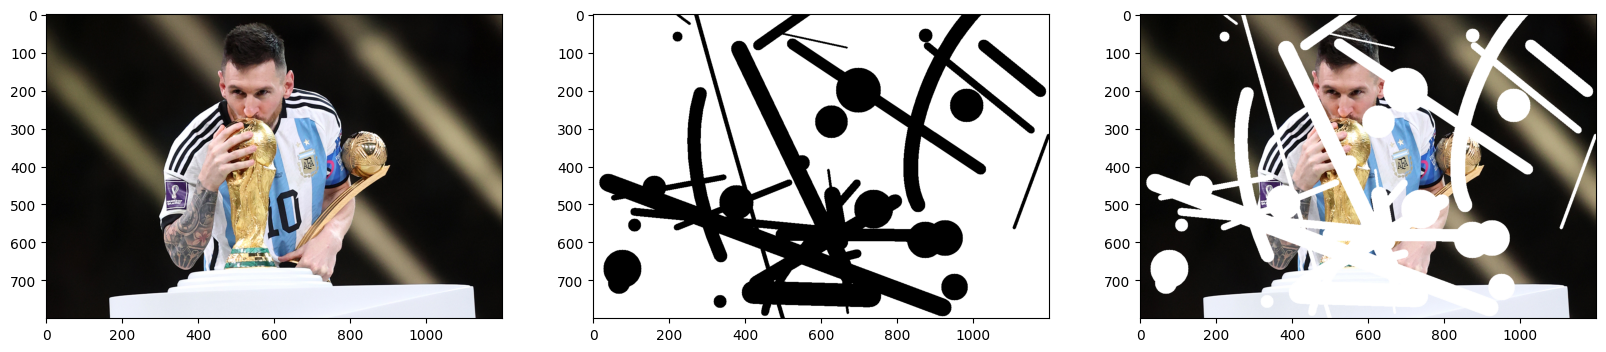

True

In [2]:
# Load image
img = cv2.imread('./data/messi.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

shape = img.shape
print(f"Shape of image is: {shape}")

img = cv2.resize(img, (512, 512))

# Instantiate mask generator
mask_generator = CustomMaskGenerator(512, 512, rand_seed=None, channels=3)

# Load mask
mask = mask_generator._generate_mask()

# Image + mask
masked_img = deepcopy(img)
masked_img[mask==0] = 255

# Show side by side
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(img)
axes[1].imshow(mask*255)
axes[2].imshow(masked_img)
plt.show()

cv2.imwrite('./data/mask_image.png', masked_img)
cv2.imwrite('./data/mask.png', mask)


In [3]:
from libs.PConv.pconv_model import pdresnet101

# Change to root path
if os.path.basename(os.getcwd()) != 'image-inpainting-app':
    os.chdir('..')

model = pdresnet101(pretrained=True)

d:\GENERATIVE_AI\GenerativeCV\image-inpainting-app\libs\PConv\pconv_model.py:22: SyntaxWarning: invalid escape sequence '\G'
  'pdresnet101': 'D:\GENERATIVE_AI\GenerativeCV\image-inpainting-app\model\PConv\pdresnet101.pth.tar',
d:\GENERATIVE_AI\GenerativeCV\image-inpainting-app\libs\PConv\pconv_model.py:171: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start se

In [4]:
import torch 
import torchvision.transforms as transforms
from PIL import Image

# image mask preprocessing 
# Define preprocessing pipeline (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize to the expected size
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization based on ImageNet statistics
])

masked_img = Image.open('./data/mask_image.png').convert("RGB")
mask = Image.open('./data/mask.png').convert("RGB") 

image_tensor = transform(masked_img).unsqueeze(0)  # Add batch dimension
mask_tensor = transform(mask).unsqueeze(0)  # Add batch dimension

model.eval()
with torch.no_grad():
    output, updated_mask = model(image_tensor, mask_tensor)  # Pass image and mask

output_image = output.squeeze(0).permute(1, 2, 0).numpy()  # Remove batch dimension and permute to HWC
output_image = (output_image * 255).astype('uint8')  # Denormalize and convert to uint8

# Save or display the inpainted image
import matplotlib.pyplot as plt
plt.imshow(output_image)
plt.show()


d:\GENERATIVE_AI\GenerativeCV\image-inpainting-app\libs\PConv\pconv_model.py:22: SyntaxWarning: invalid escape sequence '\G'
  'pdresnet101': 'D:\GENERATIVE_AI\GenerativeCV\image-inpainting-app\model\PConv\pdresnet101.pth.tar',


AttributeError: 'tuple' object has no attribute 'dim'